# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='
farenheit = 'units='

query_url = f'{base_url}{city}&units=imperial&appid={weather_api_key}'

response = requests.get(query_url).json()
response

{'coord': {'lon': 19.2345, 'lat': -34.4187},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 72,
  'feels_like': 74.68,
  'temp_min': 72,
  'temp_max': 72,
  'pressure': 1008,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 8.39, 'deg': 172},
 'clouds': {'all': 80},
 'dt': 1613107249,
 'sys': {'type': 3,
  'id': 2006131,
  'country': 'ZA',
  'sunrise': 1613103294,
  'sunset': 1613151593},
 'timezone': 7200,
 'id': 3366880,
 'name': 'Hermanus',
 'cod': 200}

In [4]:
name = []
country = []
lat = []
lng = []
temp_max = []
humid = []
clouds = []
wind = []
date = []

for city in cities:
    
    query_url = f'{base_url}{city}&units=imperial&appid={weather_api_key}'
    response = requests.get(query_url).json()
    
    try:
        name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        
        print(f"Retrieving Results for {city}. Appending stats.")
        
    except:
        print(f'{city} not found.')
        pass
        

Retrieving Results for turbat. Appending stats.
Retrieving Results for tiksi. Appending stats.
Retrieving Results for naze. Appending stats.
Retrieving Results for rikitea. Appending stats.
Retrieving Results for san francisco. Appending stats.
Retrieving Results for vaini. Appending stats.
Retrieving Results for albany. Appending stats.
Retrieving Results for hilo. Appending stats.
Retrieving Results for guanica. Appending stats.
Retrieving Results for castro. Appending stats.
Retrieving Results for ushuaia. Appending stats.
illoqqortoormiut not found.
Retrieving Results for cape town. Appending stats.
Retrieving Results for tuktoyaktuk. Appending stats.
Retrieving Results for coihaique. Appending stats.
Retrieving Results for mataura. Appending stats.
Retrieving Results for olafsvik. Appending stats.
Retrieving Results for ucluelet. Appending stats.
Retrieving Results for bredasdorp. Appending stats.
Retrieving Results for guerrero negro. Appending stats.
Retrieving Results for gumda

Retrieving Results for vanatori-neamt. Appending stats.
Retrieving Results for teguldet. Appending stats.
Retrieving Results for kendari. Appending stats.
Retrieving Results for giyon. Appending stats.
Retrieving Results for cedar city. Appending stats.
Retrieving Results for port hedland. Appending stats.
lolua not found.
Retrieving Results for nantucket. Appending stats.
Retrieving Results for pacific grove. Appending stats.
Retrieving Results for port keats. Appending stats.
Retrieving Results for moose factory. Appending stats.
inderborskiy not found.
saleaula not found.
Retrieving Results for kavaratti. Appending stats.
Retrieving Results for sinnamary. Appending stats.
Retrieving Results for mitsamiouli. Appending stats.
Retrieving Results for bilma. Appending stats.
Retrieving Results for luderitz. Appending stats.
Retrieving Results for codrington. Appending stats.
Retrieving Results for elat. Appending stats.
Retrieving Results for torbay. Appending stats.
Retrieving Results f

Retrieving Results for mattru. Appending stats.
Retrieving Results for marshfield. Appending stats.
Retrieving Results for san patricio. Appending stats.
Retrieving Results for biak. Appending stats.
Retrieving Results for vila velha. Appending stats.
Retrieving Results for nhamunda. Appending stats.
Retrieving Results for oktyabrskiy. Appending stats.
Retrieving Results for linkoping. Appending stats.
Retrieving Results for nikolskoye. Appending stats.
Retrieving Results for kontagora. Appending stats.
Retrieving Results for kita. Appending stats.
Retrieving Results for lethem. Appending stats.
Retrieving Results for barrow. Appending stats.
Retrieving Results for masallatah. Appending stats.
Retrieving Results for yuli. Appending stats.
Retrieving Results for kirovsk. Appending stats.
Retrieving Results for san ignacio. Appending stats.
Retrieving Results for kuala terengganu. Appending stats.
Retrieving Results for vao. Appending stats.
Retrieving Results for tonstad. Appending stat

Retrieving Results for kuryk. Appending stats.
Retrieving Results for rincon. Appending stats.
Retrieving Results for pemba. Appending stats.
Retrieving Results for pali. Appending stats.
tabiauea not found.
Retrieving Results for dubai. Appending stats.
attawapiskat not found.
katha not found.
Retrieving Results for barinas. Appending stats.
Retrieving Results for pauini. Appending stats.
Retrieving Results for kenai. Appending stats.
Retrieving Results for fairbanks. Appending stats.
Retrieving Results for algiers. Appending stats.
Retrieving Results for batemans bay. Appending stats.
Retrieving Results for walvis bay. Appending stats.
Retrieving Results for los llanos de aridane. Appending stats.
Retrieving Results for yeppoon. Appending stats.
Retrieving Results for kristinehamn. Appending stats.
karaul not found.
Retrieving Results for ust-nera. Appending stats.
Retrieving Results for tessalit. Appending stats.
Retrieving Results for ishinomaki. Appending stats.
Retrieving Results

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame
weather_df = pd.DataFrame({
    'City': name,
    'Country': country,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp_max,
    'Humidity': humid,
    'Cloudiness': clouds,
    'Wind Speed': wind,
    'Date': date,
})
    
weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Turbat,PK,26.0023,63.0440,77.58,16,7,2.84,1613107619
1,Tiksi,RU,71.6872,128.8694,-8.88,89,48,3.98,1613107317
2,Naze,JP,28.3667,129.4833,64.40,82,75,24.16,1613107416
3,Rikitea,PF,-23.1203,-134.9692,79.56,67,98,3.11,1613107240
4,San Francisco,US,37.7749,-122.4194,53.60,87,90,18.41,1613107241
...,...,...,...,...,...,...,...,...,...
545,Luangwa,ZM,-15.6167,30.4167,72.34,91,100,1.90,1613107778
546,Kozhva,RU,65.1073,57.0459,-19.19,87,100,2.66,1613107778
547,Aubenas,FR,44.6201,4.3899,37.00,73,100,2.73,1613107779
548,La Asuncion,VE,11.0333,-63.8628,75.34,85,89,15.26,1613107779


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
# weather_df.dtypes

# just in case
weather_df = weather_df.loc[weather_df['Humidity'] < 100]

weather_df.to_csv('output_data/weather_data.csv')

weathercsv_df = pd.read_csv('output_data/weather_data.csv', low_memory=False)

weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Turbat,PK,26.0023,63.0440,77.58,16,7,2.84,1613107619
1,Tiksi,RU,71.6872,128.8694,-8.88,89,48,3.98,1613107317
2,Naze,JP,28.3667,129.4833,64.40,82,75,24.16,1613107416
3,Rikitea,PF,-23.1203,-134.9692,79.56,67,98,3.11,1613107240
4,San Francisco,US,37.7749,-122.4194,53.60,87,90,18.41,1613107241
...,...,...,...,...,...,...,...,...,...
545,Luangwa,ZM,-15.6167,30.4167,72.34,91,100,1.90,1613107778
546,Kozhva,RU,65.1073,57.0459,-19.19,87,100,2.66,1613107778
547,Aubenas,FR,44.6201,4.3899,37.00,73,100,2.73,1613107779
548,La Asuncion,VE,11.0333,-63.8628,75.34,85,89,15.26,1613107779


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

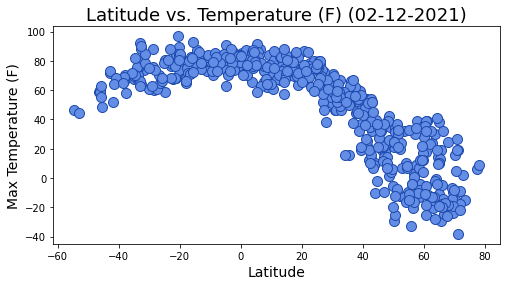

In [7]:
lat_x = weather_df['Lat']
temp_y = weather_df['Max Temp']

# get date variable
date = weather_df['Date'].max()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y')

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title(f'Latitude vs. Temperature (F) ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)

plt.savefig('output_data/01_temp.png')
plt.show()

### Observations
This plot has a relative arc to it in that from the left southern hemisphere, the dots trend warmer in temperature as they get closer to 0 (the equator). As the latitude increases above zero (northern hemisphere), the temperatures decrease. Temperatures in the northern hemisphere are lower than the souther hemisphere because it is currently winter in the northern hemisphere.

## Latitude vs. Humidity Plot

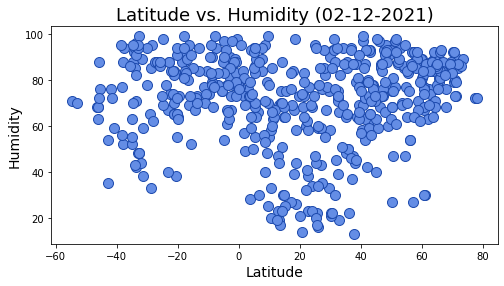

In [8]:
lat_x = weather_df['Lat']
humid_y = weather_df['Humidity']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title(f'Latitude vs. Humidity ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)

plt.savefig('output_data/02_humidity.png')
plt.show()

### Obervations
This plot does not take on any shape that would indicate a pattern other than--at a glance--it seems to be slightly more humid in the northern hemisphere. That is, the dots are more condensed in the upper-right of the plot.

## Latitude vs. Cloudiness Plot

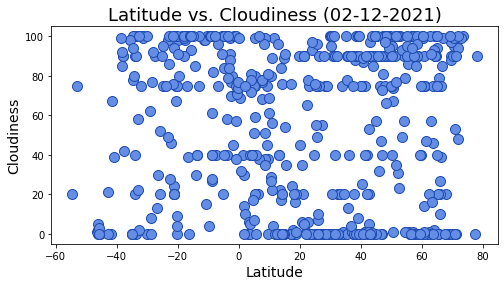

In [9]:
lat_x = weather_df['Lat']
cloud_y = weather_df['Cloudiness']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, cloud_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title(f'Latitude vs. Cloudiness ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness', fontsize=14)

plt.savefig('output_data/03_cloudiness.png')
plt.show()

### Observations
Cloudiness does not appear to be strongly affected by latitude.

## Latitude vs. Wind Speed Plot

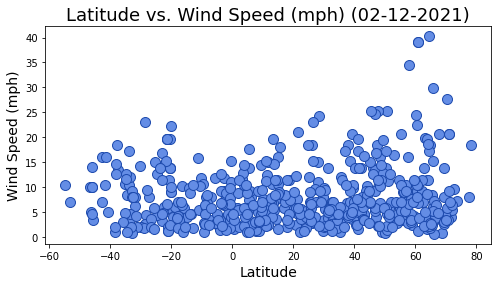

In [10]:
lat_x = weather_df['Lat']
wind_y = weather_df['Wind Speed']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, wind_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title(f'Latitude vs. Wind Speed (mph) ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)

plt.savefig('output_data/04_wind_speed.png')
plt.show()

### Obervations
Wind is evenly spread across all latitudes.

## Linear Regression

In [11]:
northern_df = weather_df.loc[weather_df['Lat'] > 0]
# northern_df

southern_df = weather_df.loc[weather_df['Lat'] < 0]
# southern_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

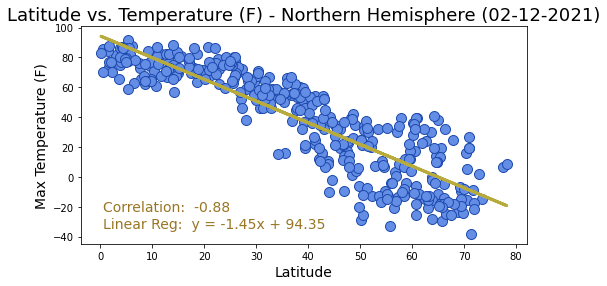

In [12]:
n_lat_x = northern_df['Lat']
n_temp_y = northern_df['Max Temp']

n_temp_slope, n_temp_int, n_temp_r, n_temp_p, n_temp_std_err = linregress(n_lat_x, n_temp_y)
n_temp_regression = n_temp_slope * n_lat_x + n_temp_int
n_temp_regression_txt = f'y = {str(round(n_temp_slope,2))}x + {str(round(n_temp_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_temp_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Latitude vs. Temperature (F) - Northern Hemisphere ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.annotate(f'Correlation:  {round(n_temp_r, 2)}', xy=(0.05, 0.15), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_temp_regression_txt}', xy=(0.05, 0.07), xycoords='axes fraction', \
             fontsize=14, color='#997625')

plt.savefig('output_data/05_ntemp_reg.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

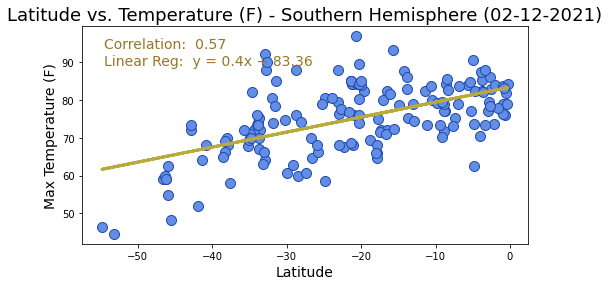

In [13]:
s_lat_x = southern_df['Lat']
s_temp_y = southern_df['Max Temp']

s_temp_slope, s_temp_int, s_temp_r, s_temp_p, s_temp_std_err = linregress(s_lat_x, s_temp_y)
s_temp_regression = s_temp_slope * s_lat_x + s_temp_int
s_temp_regression_txt = f'y = {str(round(s_temp_slope,2))}x + {str(round(s_temp_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_temp_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Latitude vs. Temperature (F) - Southern Hemisphere ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.annotate(f'Correlation:  {round(s_temp_r, 2)}', xy=(0.05, 0.9), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_temp_regression_txt}', xy=(0.05, 0.82), xycoords='axes fraction', \
             fontsize=14, color='#997625')

plt.savefig('output_data/06_stemp_reg.png')
plt.show()

### Observations
As explained in the first Temperature scatterplot, temperature increases as we approach the equator and then drops as we get further away. Right now, the Northern Hemisphere has a more dramatic negative correlation than the Southern Hemisphere's positive correlation. This is possibly due to the wider range of temperature in the winter than in the summer. In winter, temps can still range from 90s/100s to -30s/-40s.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

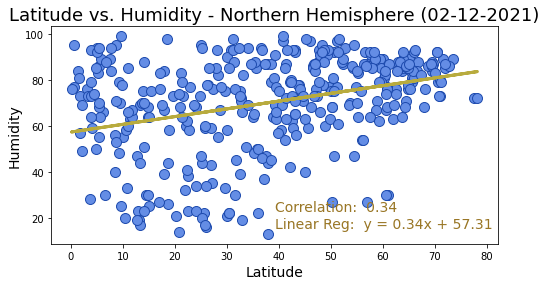

In [14]:
n_lat_x = northern_df['Lat']
n_humid_y = northern_df['Humidity']

n_humid_slope, n_humid_int, n_humid_r, n_humid_p, n_humid_std_err = linregress(n_lat_x, n_humid_y)
n_humid_regression = n_humid_slope * n_lat_x + n_humid_int
n_humid_regression_txt = f'y = {str(round(n_humid_slope,2))}x + {str(round(n_humid_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_humid_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Latitude vs. Humidity - Northern Hemisphere ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.annotate(f'Correlation:  {round(n_humid_r, 2)}', xy=(0.50, 0.15), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_humid_regression_txt}', xy=(0.50, 0.07), xycoords='axes fraction', \
             fontsize=14, color='#997625')

plt.savefig('output_data/07_nhumidity_reg.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

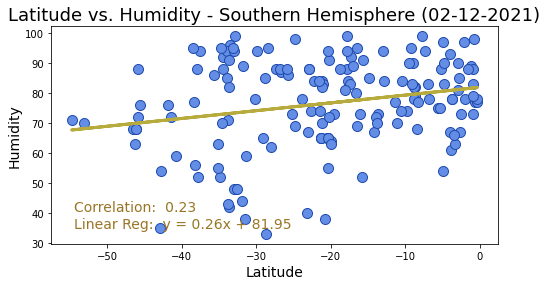

In [15]:
s_lat_x = southern_df['Lat']
s_humid_y = southern_df['Humidity']

s_humid_slope, s_humid_int, s_humid_r, s_humid_p, s_humid_std_err = linregress(s_lat_x, s_humid_y)
s_humid_regression = s_humid_slope * s_lat_x + s_humid_int
s_humid_regression_txt = f'y = {str(round(s_humid_slope,2))}x + {str(round(s_humid_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_humid_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Latitude vs. Humidity - Southern Hemisphere ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.annotate(f'Correlation:  {round(s_humid_r, 2)}', xy=(0.05, 0.15), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_humid_regression_txt}', xy=(0.05, 0.07), xycoords='axes fraction', \
             fontsize=14, color='#997625')

plt.savefig('output_data/08_shumidity_reg.png')
plt.show()

### Observations
Both graphs display a weak correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

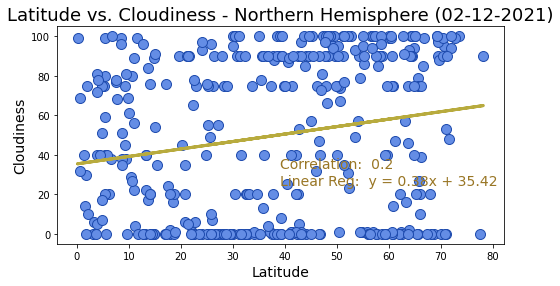

In [16]:
n_lat_x = northern_df['Lat']
n_cloud_y = northern_df['Cloudiness']

n_cloud_slope, n_cloud_int, n_cloud_r, n_cloud_p, n_cloud_std_err = linregress(n_lat_x, n_cloud_y)
n_cloud_regression = n_cloud_slope * n_lat_x + n_cloud_int
n_cloud_regression_txt = f'y = {str(round(n_cloud_slope,2))}x + {str(round(n_cloud_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_cloud_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_cloud_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Latitude vs. Cloudiness - Northern Hemisphere ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness', fontsize=14)
plt.annotate(f'Correlation:  {round(n_cloud_r, 2)}', xy=(0.50, 0.35), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_cloud_regression_txt}', xy=(0.50, 0.27), xycoords='axes fraction', \
             fontsize=14, color='#997625')

plt.savefig('output_data/09_ncloudiness_reg.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

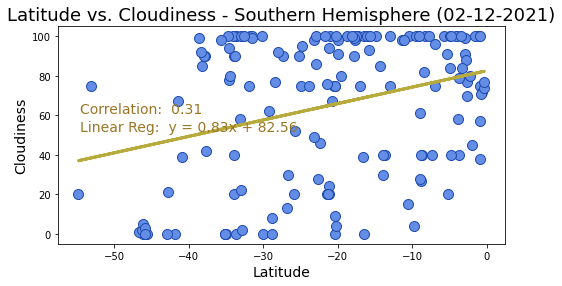

In [17]:
s_lat_x = southern_df['Lat']
s_cloud_y = southern_df['Cloudiness']

s_cloud_slope, s_cloud_int, s_cloud_r, s_cloud_p, s_cloud_std_err = linregress(s_lat_x, s_cloud_y)
s_cloud_regression = s_cloud_slope * s_lat_x + s_cloud_int
s_cloud_regression_txt = f'y = {str(round(s_cloud_slope,2))}x + {str(round(s_cloud_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_cloud_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_cloud_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Latitude vs. Cloudiness - Southern Hemisphere ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness', fontsize=14)
plt.annotate(f'Correlation:  {round(s_cloud_r, 2)}', xy=(0.05, 0.6), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_cloud_regression_txt}', xy=(0.05, 0.52), xycoords='axes fraction', \
             fontsize=14, color='#997625')

plt.savefig('output_data/10_scloudiness_reg.png')
plt.show()

### Observations
Both graphs display a weak correlation between latitude and cloudiness. Even though the southern hemisphere has a stronger correlation, it's still not very compelleing when considering how scattered the data is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

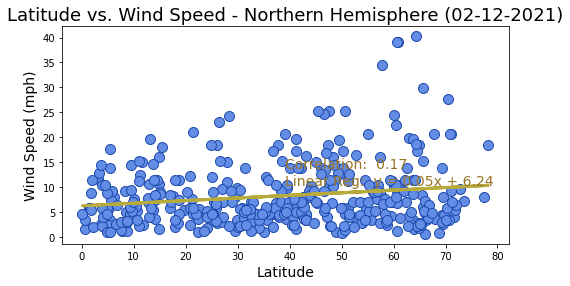

In [18]:
n_lat_x = northern_df['Lat']
n_wind_y = northern_df['Wind Speed']

n_wind_slope, n_wind_int, n_wind_r, n_wind_p, n_wind_std_err = linregress(n_lat_x, n_wind_y)
n_wind_regression = n_wind_slope * n_lat_x + n_wind_int
n_wind_regression_txt = f'y = {str(round(n_wind_slope,2))}x + {str(round(n_wind_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_wind_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_wind_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Latitude vs. Wind Speed - Northern Hemisphere ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.annotate(f'Correlation:  {round(n_wind_r, 2)}', xy=(0.50, 0.35), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {n_wind_regression_txt}', xy=(0.50, 0.27), xycoords='axes fraction', \
             fontsize=14, color='#997625')

plt.savefig('output_data/11_nwindspeed_reg.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

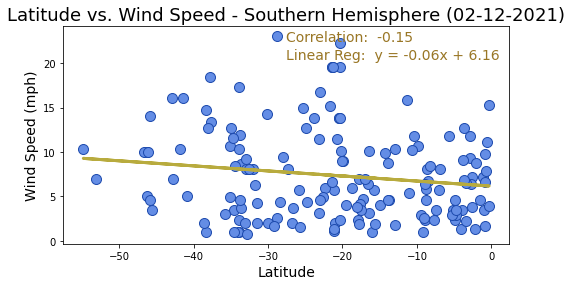

In [19]:
s_lat_x = southern_df['Lat']
s_wind_y = southern_df['Wind Speed']

s_wind_slope, s_wind_int, s_wind_r, s_wind_p, s_wind_std_err = linregress(s_lat_x, s_wind_y)
s_wind_regression = s_wind_slope * s_lat_x + s_wind_int
s_wind_regression_txt = f'y = {str(round(s_wind_slope,2))}x + {str(round(s_wind_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(s_lat_x, s_wind_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(s_lat_x, s_wind_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Latitude vs. Wind Speed - Southern Hemisphere ({date})', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.annotate(f'Correlation:  {round(s_wind_r, 2)}', xy=(0.5, 0.93), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {s_wind_regression_txt}', xy=(0.5, 0.85), xycoords='axes fraction', \
             fontsize=14, color='#997625')

plt.savefig('output_data/12_swindspeed_reg.png')
plt.show()

### Observations
Both graphs display a weak correlation between latitude and wind speed. The weakest of all graphs, in fact.